# DSCI 100 Final Project (Individual Component) #
### Mary Leung (34578872) ###

In [1]:
# Install Tidyverse
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [6]:
players_data <- read_csv("data/players.csv") |>
    head()
players_data
sessions_data <- read_csv("data/sessions.csv") |>
    head()
sessions_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


## (1) Description of the Data ##

This data collected by a UBC research group led by Frank Wood, PLAI, contains information about minecraft players and their playing habits on a server. The data uses these 11 variables:
* <code>experience</code>: Level of experience of the player
    * character variable
* <code>subscribe</code>: Whether the player is subscribed to a game-related newsletter
    * logical variable
* <code>hashedEmail</code>: Transformed email address of player that can identify them
    * character variable
* <code>played_hours</code>: Total time spent playing on the server in hours
    * numeric variable
    * Mean value: 5.85 hours
* <code>name</code>: Name of player
    * character variable
* <code>gender</code>: Gender of player
    * character variable
* <code>Age</code>: Age of player
    * numeric variable
    * Mean value: 21.14 years old
* <code>start_time</code>: Start date and time of a play session
    * character variable
* <code>end_time</code>: End date and time of a play session
    * character variable
* <code>original_start_time</code>: Start date and time of a play session in UNIX time (milliseconds)
    * numeric variable
    * Mean value: 1.719e+12
* <code>original_end_time</code>: End date and time of a play session in UNIX time (milliseconds)
    * numeric variable
    * Mean value: 1.719e+12

There are 196 observations in the players dataset, and 1535 observations in the sessions dataset. An issue present in the data presented is found in the variables <code>original_start_time</code> and <code>original_end_time</code>. Its millisecond format is rounded to increments of 166.67 minutes and therefore not very specific to the time. Another potential issue that could arise is the overrepresentation of some demographics over others, especially within gender and age. It may be difficult to use underrepresented values to predict using k-nn due to the lack of votes they can contribute.

In [3]:
players_summary <- summary(players_data)
players_summary
sessions_summary <- summary(sessions_data)
sessions_summary

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

## (2) Questions ##

Broad: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

Specific: Can age and time spent playing predict whether a player will subscribe to a game-related newletter in amateur-level players and veteran-level players?

## (3) Exploratory Data Analysis and Visualization ##

### (a) Mean Values of Quantitative Data

In [4]:
players_mean <- players_data |>
    summarize(
        mean_played_hours = mean(played_hours),
        mean_Age = mean(Age, na.rm = TRUE))

sessions_mean <- sessions_data |>
    summarize(
        mean_original_start_time = mean(original_start_time),
        mean_original_end_time = mean(original_end_time, na.rm = TRUE))

data_mean <- players_mean |>
    bind_cols(sessions_mean) |>
    round(2)
data_mean

mean_played_hours,mean_Age,mean_original_start_time,mean_original_end_time
<dbl>,<dbl>,<dbl>,<dbl>
5.85,21.14,1.719201e+12,1.719196e+12


### (b) Relationship between Age of Player, Time Spent Playing, and Newletter Subcription

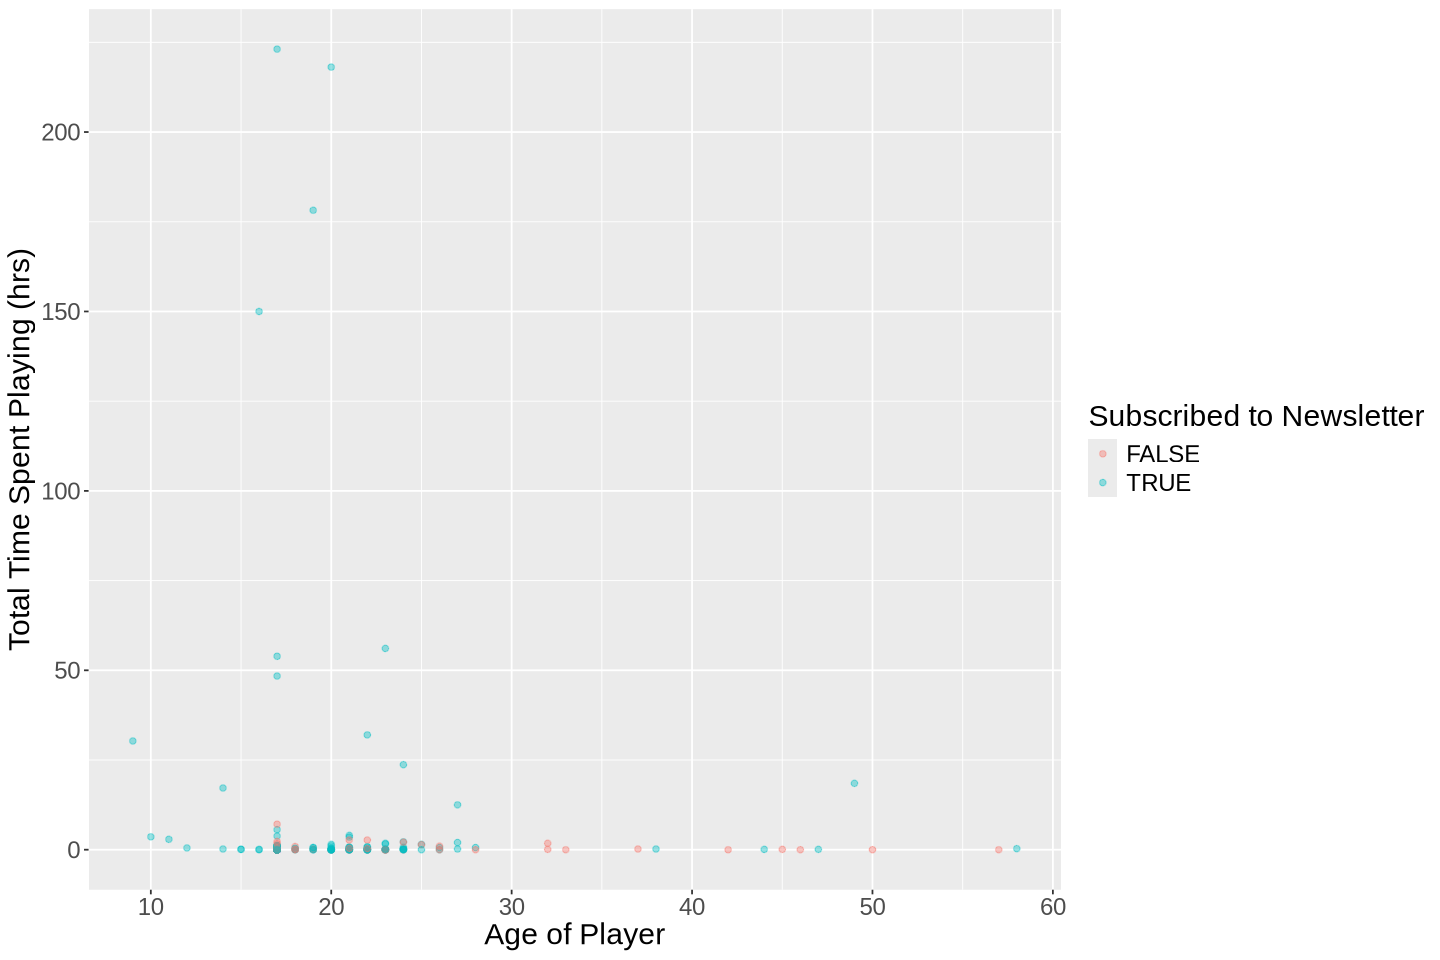

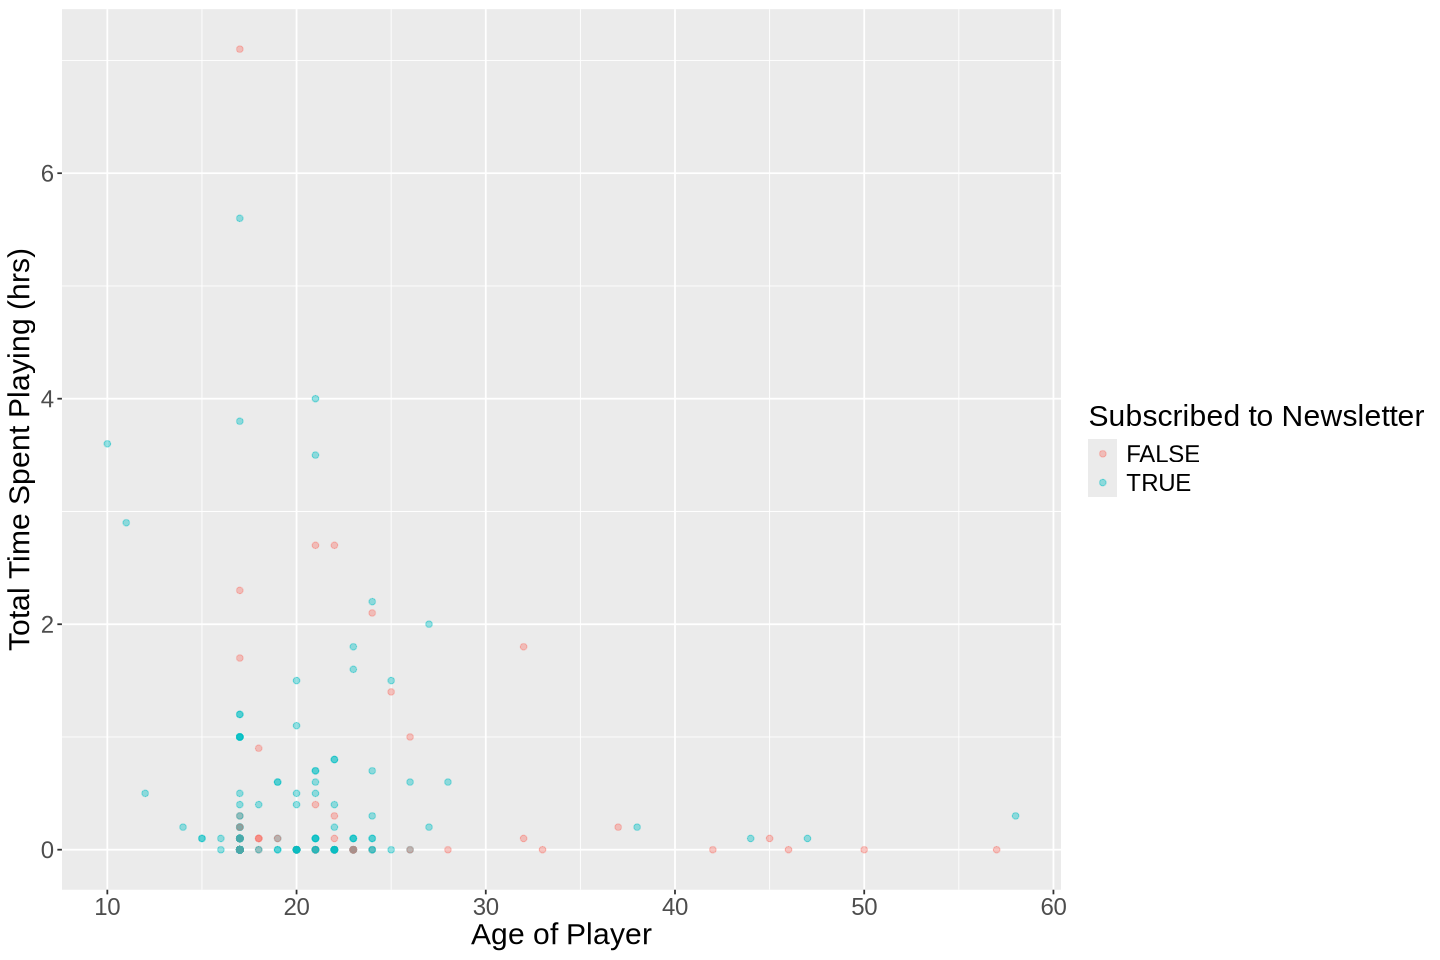

In [18]:
options(repr.plot.height = 8, repr.plot.width = 12)
subscription_time_age_plot <- players_data |>
    ggplot(aes(x = Age, y = played_hours, color = subscribe)) +
    geom_point(alpha = 0.4, na.rm = TRUE) +
    labs(x = "Age of Player", y = "Total Time Spent Playing (hrs)", color = "Subscribed to Newsletter") +
    theme(text = element_text(size = 18))
subscription_time_age_plot

subscription_time_age_plot_under_10 <- players_data |>
    filter(played_hours <= 10) |>
    ggplot(aes(x = Age, y = played_hours, color = subscribe)) +
    geom_point(alpha = 0.4, na.rm = TRUE) +
    labs(x = "Age of Player", y = "Total Time Spent Playing (hrs)", color = "Subscribed to Newsletter") +
    theme(text = element_text(size = 18))
subscription_time_age_plot_under_10

The second graph excludes many extreme outliers and lessens the effect of overplotting. Most players are under 30 years old and have played under 10 hours.

### (c) Relationship between Experience Level of Players and Newsletter Subscription

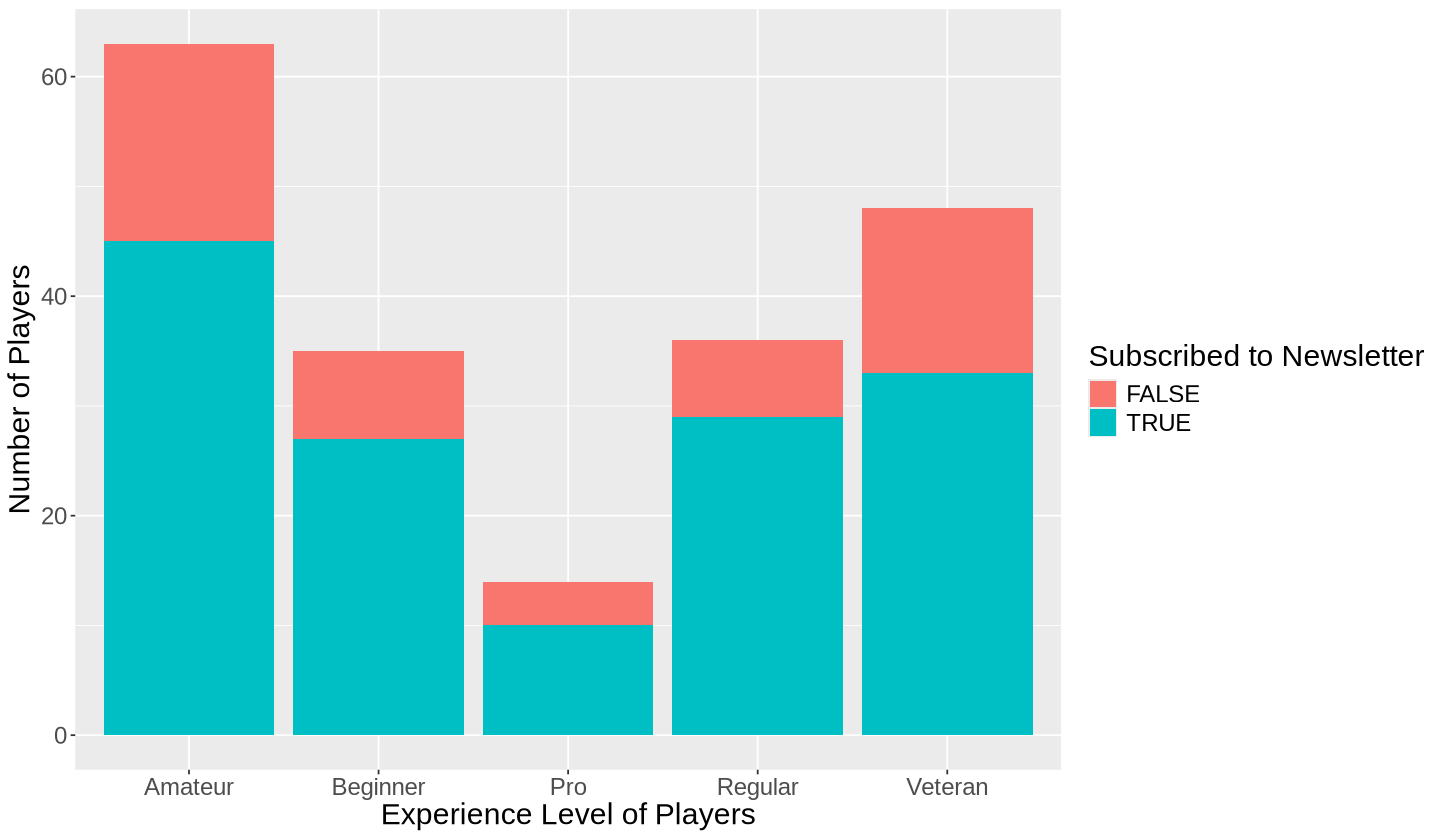

In [19]:
options(repr.plot.height = 7, repr.plot.width = 12)
age_experience_plot <- ggplot(players_data, aes(x = experience, fill = subscribe)) +
    geom_bar(position = "stack", stat = "count") +
    theme(text = element_text(size = 18)) +
    labs(x = "Experience Level of Players", y = "Number of Players", fill = "Subscribed to Newsletter")
age_experience_plot

The majority of players are subscribed to the newsletter in all experience level groups. There are the most amateur players, followed by veterans.

### (d) Duration of Playing Session

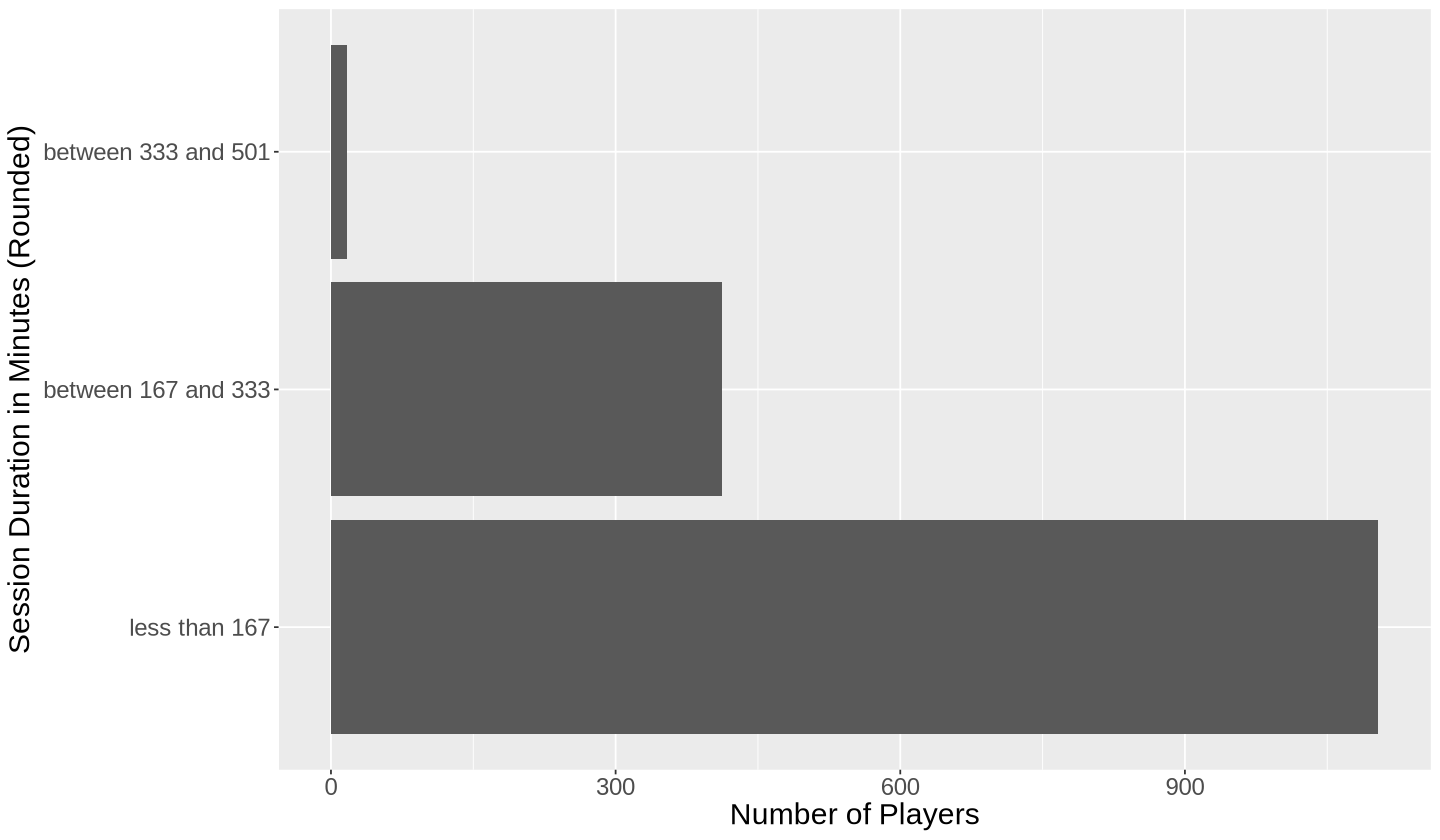

In [20]:
options(repr.plot.height = 7, repr.plot.width = 12)

session_duration <- sessions_data |>
    filter(!is.na(original_end_time)) |>
    mutate(duration_mins = (original_end_time - original_start_time)/60000) |>
    select(duration_mins) |>
    round(0) |>
    mutate(duration_mins = as.factor(duration_mins)) |>
    mutate(duration_mins = fct_recode(duration_mins,
        "less than 167" = "0",
        "between 167 and 333" = "167",
        "between 333 and 501" = "333")) |>
    ggplot(aes(y = duration_mins)) +
        geom_bar(stat = "count", position = "stack") +
        labs(y = "Session Duration in Minutes (Rounded)", x = "Number of Players") +
        theme(text = element_text(size = 18))
session_duration

The play sessions are in increments of 167 minutes. The most players play under 167 minutes in each session.

### (e) Relationship between Age and Newsletter Subscription

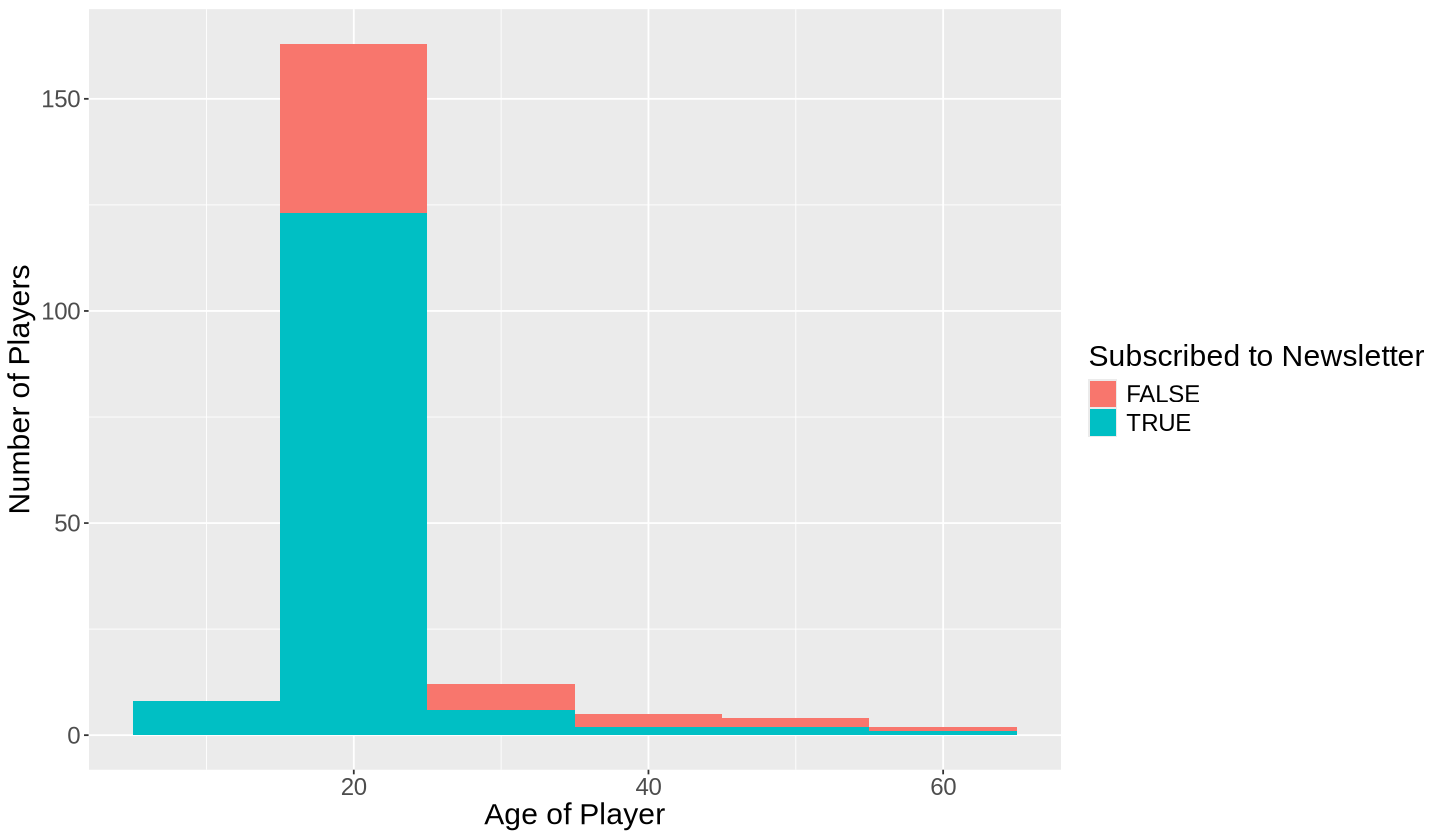

In [21]:
options(repr.plot.height = 7, repr.plot.width = 12)

age_subscribe_histogram <- players_data |>
    filter(!is.na(Age)) |>
    ggplot(aes(x = Age, fill = subscribe)) +
    geom_histogram(binwidth = 10) +
    labs(x = "Age of Player", y = "Number of Players", fill = "Subscribed to Newsletter") +
    theme(text = element_text(size = 18))

age_subscribe_histogram

Everyone under the age of 15 is subscribed to the newsletter. Most people between the age of 15 and 25 are subscribed to the newsletter. The large majority of players are between the ages of 15 and 25.

### (f) Relationship between Age, Experience Level, and Newletter Subscription in Amateurs vs. Veterans

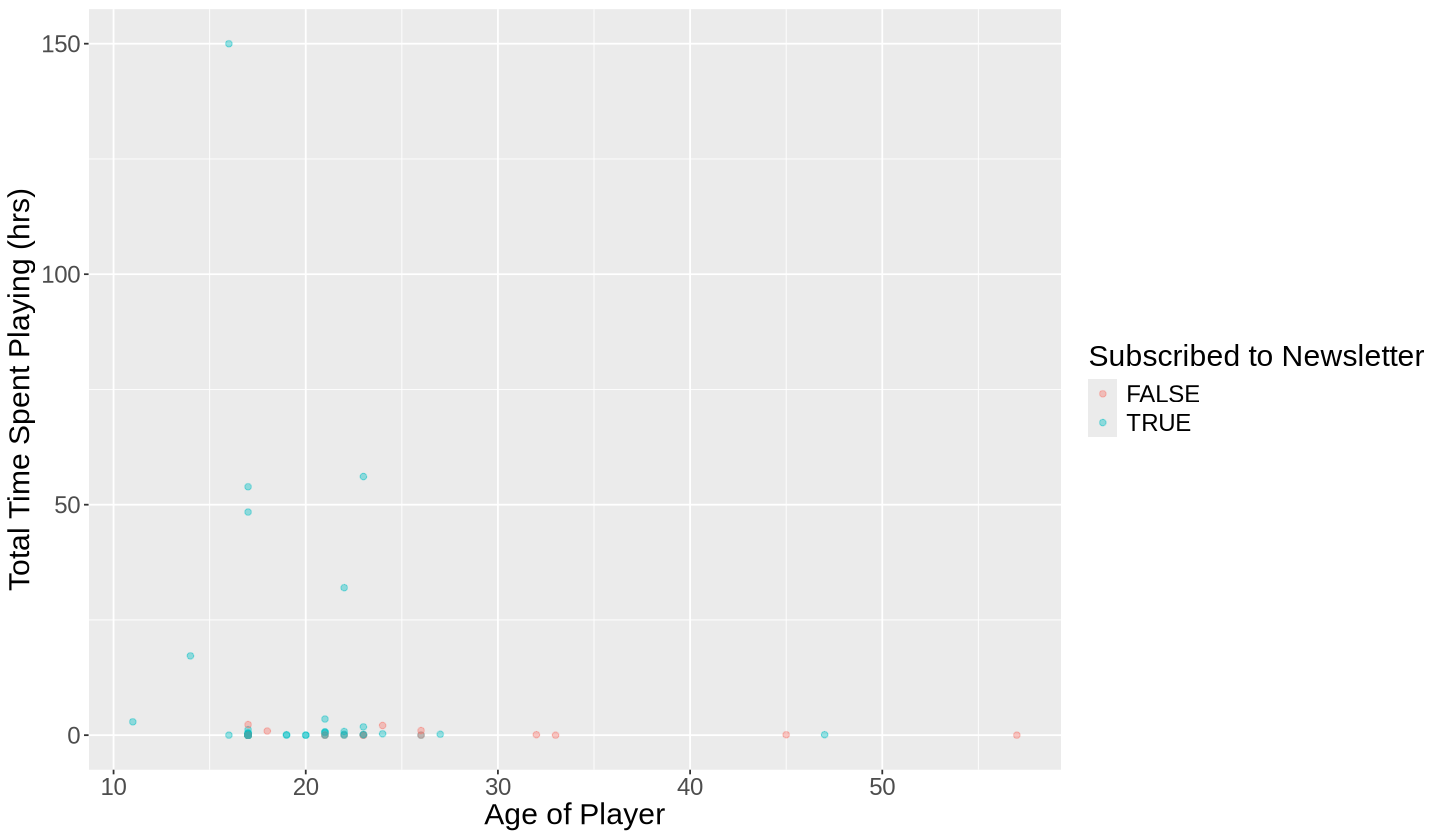

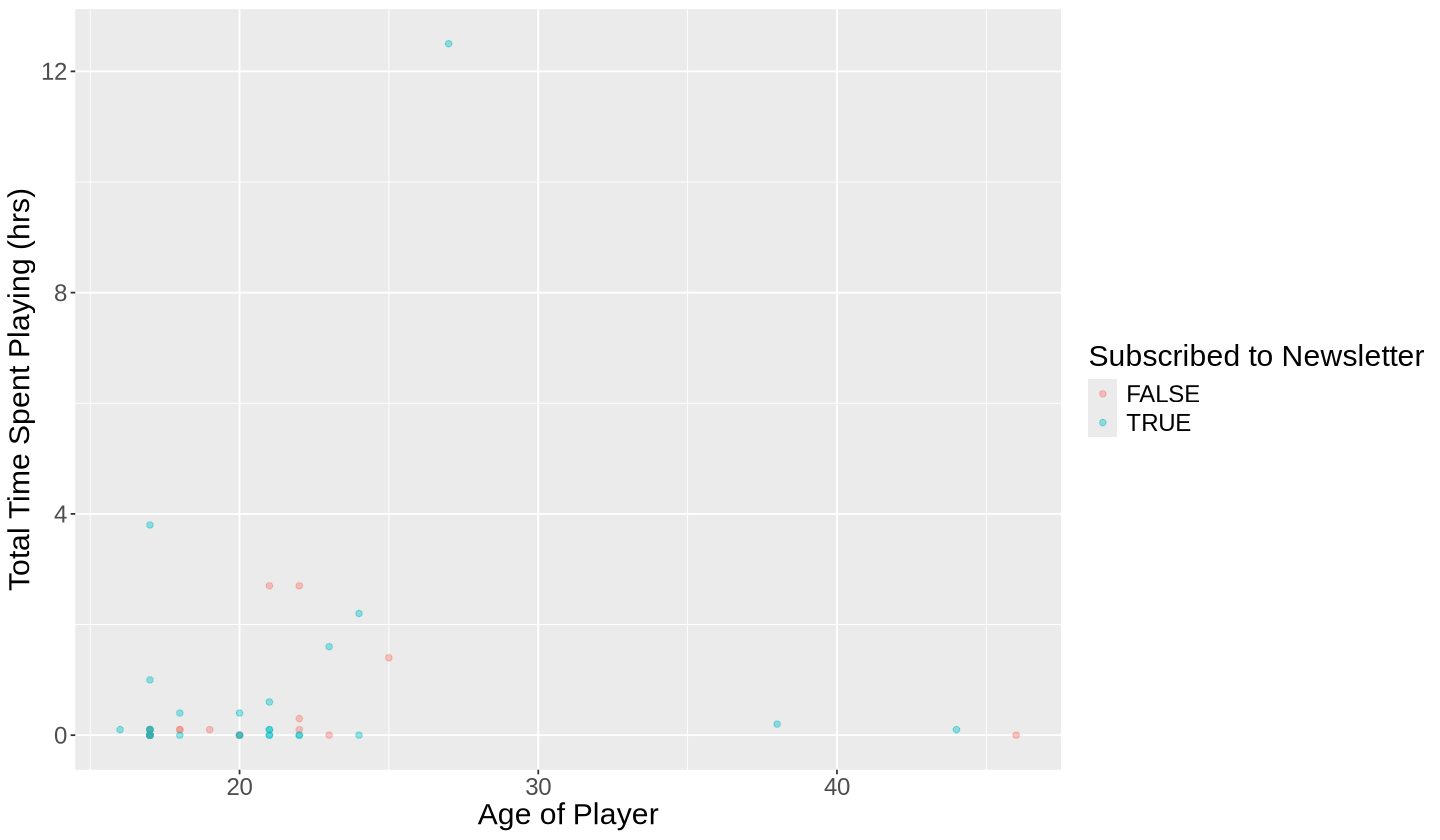

In [22]:
age_played_hours_amateurs_plot <- players_data |>
    filter(experience == "Amateur") |>
    ggplot(aes(x = Age, y = played_hours, color = subscribe)) +
    geom_point(alpha = 0.4) +
    labs(x = "Age of Player", y = "Total Time Spent Playing (hrs)", color = "Subscribed to Newsletter") +
    theme(text = element_text(size = 18))
age_played_hours_amateurs_plot

age_played_hours_veterans_plot <- players_data |>
    filter(experience == "Veteran") |>
    ggplot(aes(x = Age, y = played_hours, color = subscribe)) +
    geom_point(alpha = 0.4) +
    labs(x = "Age of Player", y = "Total Time Spent Playing (hrs)", color = "Subscribed to Newsletter") +
    theme(text = element_text(size = 18))
age_played_hours_veterans_plot

There seems to be a greater variation in age and total time spent playing in amateurs compared to veterans.

## (4) Methods and Plan ##

I plan to use k-nn classification to predict if a player (amateur or veteran) will be subscribed to a game-related newsletter based on their age and total play time. I will separate the dataset by filtering for players with the two different experience levels. I will apply the same strategy and compare predictor results at the end. I will split each dataset into a training set (70% of training) and a testing set (30% of training). Then, I will use the training set to build the model, first creating a recipe that stardardizes the data, and specifies age (<code>Age</code>) and total play time (<code>played_hours</code>) as the predictors for whether they are subscribed to the newsletter (<code>subscribe</code>). After, I will create a model specification that sets the mode as classification, uses engine kknn, a rectangular weight function, and uses "<code>tune</code>" neighbours temporarily. To find the best k, I will use a 5-fold cross validation, each fold containing a validation set. After the best k is computed, I will apply that model specification to the entire training set, and fit it into a workflow. Lastly, I will test the predictor on the testing set, and compare whether the amateur predictor or the veteran predictor performs better. 

This method of k-nn classification is appropriate because the status of subscription is divided into true or false classes. I need to assume that each player only has one account they use for the game and newsletter, so each person has an equal number of votes. A potential limitation is an underrepresentation in certain age groups or extreme play hour values (older demographic and very high total hours) that would make the predictions less accurate because they would have fewer votes in k-nn classification. Also, in the graph made in (3f), it is not apparent that there are clusters that group subscribers and non-subscribers, which makes it difficult to accurately predict subscription status based on nearest neighbours.